In [1]:
#import all required libraries
import numpy as np
from scipy.special import kn
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])

In [2]:
#setting all the constant values
from scipy import constants
hbarc= constants.value('reduced Planck constant times c in MeV fm')

In [3]:
#all masses are in MeV
me = 0.511
MPL = 1.22e22

In [4]:
#defining required functions
def H(m):
    return np.sqrt(10.75 * 4*np.pi**3 / 45) * m**3 / MPL

def Y0(x ,m):
    return neq(x,m)/S(x,m)

def neq(x, m):
    return 4/(2*np.pi**2) * m**3 / x * kn(2,x)

def S(x, m):
    return 10.75*(2*np.pi**2) / 45 * m**3 / x**3

def f(x,m,lam):
    return -1*x*S(x,m)*sigma(m,lam)/H(m)

def sigma(m,lam):
    x1=1/(12*(np.pi)**0.5)
    x2=(1-(me/m)**2)**0.5
    x3=(m/(lam**2))**2
    x4 = (7+19*(me/m)**2)
    return x1*x2*x3*x4

def dYdx(x, Y, m, lam):
    return f(x,m,lam)*(Y**2-Y0(x,m)**2)

In [5]:
#Beginning Solution
t_eval=np.linspace(1,1000,1000)

In [6]:
def Y(m, lam, span):
    result = solve_ivp(dYdx, t_span = span, t_eval=t_eval, y0= [Y0(span[0],m)], args=(m,lam))
    return result.t, result.y[0]

In [ ]:
XX1, YY1 = Y(m=500, lam=1e5, span=(1,1000))
Y01=Y0(XX1,m=500)
XX2, YY2 = Y(m=500, lam=1e6, span=(1,1000))
Y02=Y0(XX2,m=500)
XX3, YY3 = Y(m=500, lam=1e7, span=(1,1000))
Y03=Y0(XX3,m=500)
XX4, YY4 = Y(m=500, lam=1e8, span=(1,1000))
Y04=Y0(XX4,m=500)

In [ ]:
lam = np.array([1e5,1e6,1e7,1e8])
res = sigma(500,lam)
res

In [ ]:
plt.plot(XX1, YY1, color="red",label='$\mathregular{< \sigma v > = 10^{-16} MeV^{-2}}$')
plt.plot(XX1, Y01, color="red", linestyle='--',label='corresponding $\mathregular{Y_{eq}}$')
plt.plot(XX2, YY2, color="blue", label='$\mathregular{< \sigma v > = 10^{-20} MeV^{-2}}$')
plt.plot(XX2, Y02,color="blue",label='corresponding $\mathregular{Y_{eq}}$')
plt.plot(XX3, YY3,color="orange", label='$\mathregular{< \sigma v > = 10^{-24} MeV^{-2}}$')
plt.plot(XX3, Y03,color="orange", linestyle='--',label='corresponding $\mathregular{Y_{eq}}$')
plt.plot(XX4, YY4,color="black",linestyle='--', label='$\mathregular{< \sigma v > = 10^{-28} MeV^{-2}}$')
plt.plot(XX4, Y04,color="cyan", linestyle='--',label='corresponding $\mathregular{Y_{eq}}$')
plt.xlabel('$\mathregular{x = m_{χ}/T}$', fontsize=20)
plt.ylabel('$Y$', fontsize=20)
plt.grid(True)
plt.semilogx()
plt.semilogy()
plt.ylim(top=1e-1, bottom = 1e-7)
plt.legend(fontsize='medium')
plt.savefig('verify2.png',dpi=300,bbox_inches='tight')

In [5]:
def calc_all(m):
    return (sigma(m,1)*(hbarc**2)*(10**10))**0.25

In [6]:
marray = 10**np.linspace(-0.2,3,5000)
larray = calc_all(marray)
larray

array([  3020.20813131,   3023.12322014,   3026.02468366, ...,
       106240.14006642, 106318.46516654, 106396.84801165])

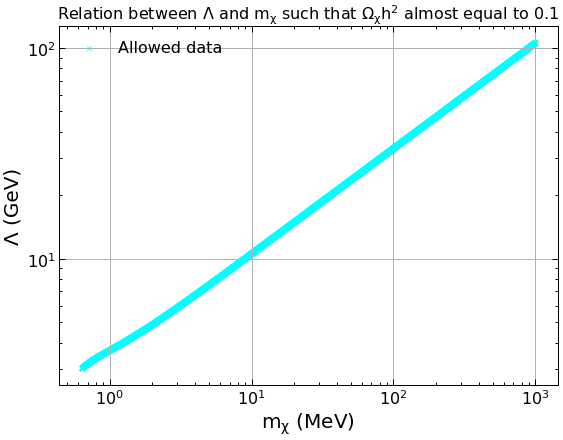

In [7]:
plt.scatter(marray,larray/1000,linewidth=1,marker='x',c='cyan',s=25,alpha=0.75,label="Allowed data")
plt.semilogx()
plt.semilogy()
plt.xlabel('$\mathregular{m_{χ}}$ (MeV)', fontsize=20)
plt.grid(True)
plt.ylabel('Λ (GeV)', fontsize=20)
plt.tight_layout()
plt.legend()
plt.title('Relation between Λ and $\mathregular{m_{χ}}$ such that $\mathregular{Ω_{χ}h^{2}}$ almost equal to 0.1')
plt.savefig('lamvsmx.png',dpi=300,bbox_inches='tight')


In [8]:
def production(m,lam):
    s = (10e-26)*((1-(4*m**2/5.76e+8))**0.5)*(5.76e+8/(lam**4))*(1+2*m**2/5.76e+8)/(12*np.pi)*(hbarc**2)
    return s

In [9]:
prod=[]
m_ar = np.linspace(800,200,7)
l_ar = calc_all(m_ar)
for i in range(len(l_ar)):
    s=production(m_ar[i],l_ar[i])
    prod.append(s)
prod=np.array(prod)
prod

array([7.25380571e-34, 9.47438496e-34, 1.28957109e-33, 1.85698332e-33,
       2.90153460e-33, 5.15827087e-33, 1.16060176e-32])

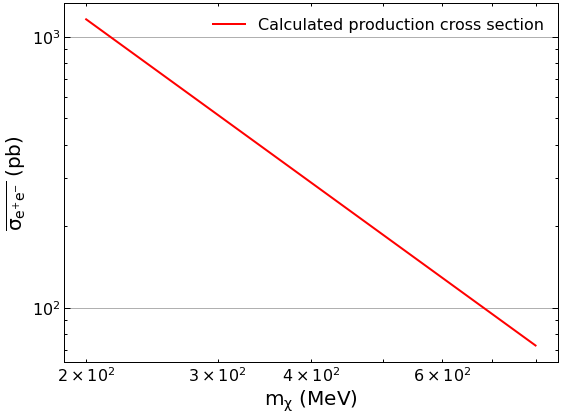

In [10]:
plt.plot(m_ar,prod/10e-36,'r-',label="Calculated production cross section")
plt.semilogx()
plt.semilogy()
plt.xlabel('$\mathregular{m_{χ}}$ (MeV)', fontsize=20)
plt.grid(True)
plt.ylabel('$\mathregular{\overline{σ_{e^{+}e^{-}}}}$ $\mathregular{(pb)}$', fontsize=20)
plt.tight_layout()
plt.legend()

In [11]:
def sigma_eps_tg(e,into,lam,m,tg):
    eps = e/root_s
    mu = m/root_s
    x1 = root_s / ((lam**4) * 137*12 *(np.pi **2))
    x2 = 1/((np.sin(tg))**2)
    x3 = (1-eps)*np.sqrt((0.5-(eps/2))**2-mu**2)/eps
    x4 = 7-14*eps+18*eps**2 + (1-2*eps-18*eps**2)*np.cos(2*tg)+3*np.pi*(1-2*eps)*eps*np.sin(tg)
    if into==1:
        return x1*x2*x3*x4*np.sin(tg) 
    else:
        return x1*x2*x3*x4

In [12]:
#we analyze this expression at 3 different masses and their allowed Λ values i.e. m = 10, 100 and 500 MeV.
#we also analyse the distribution with respect to 2 different quantities, E_gamma i.e. the energy of the monophoton
#and cosine of angle made by the photon with +ve z direction, tg.

In [13]:
#first, getting dsigma/dcos(tg)

In [14]:
m_ar = np.array([800])
l_ar = calc_all(m_ar)
root_s = 24*1000
print(root_s)

24000


In [15]:
tg = np.linspace(2*np.arctan(np.exp(2.5)),2*np.arctan(np.exp(-2.5)),2000)
xaxtg = np.cos(tg)

In [16]:
from scipy.integrate import trapezoid

In [28]:
def dsigdcos(m,lam):
    genval = []
    e_low = 0.0001*root_s
    e_up = 0.9999*2*root_s*(0.5-(m/root_s)*2)
    x=np.linspace(e_low,e_up,5000)
    for j in range(len(tg)):
        val = trapezoid(sigma_eps_tg(x,0,lam,m,tg[j]),x)*(hbarc**2)*(10e-26)
        genval.append(val)
    return genval
        

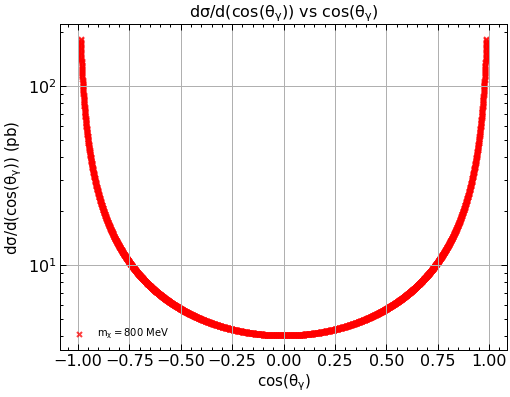

In [29]:
ym0 = np.array(dsigdcos(m_ar[0],l_ar[0]))
plt.scatter(xaxtg,ym0/(10e-36),marker='x',c='red',s=25,alpha=0.75,label='$\mathregular{m_{χ} = 800}$ MeV')
plt.xlabel('$\mathregular{cos(θ_{γ})}$', fontsize=15)
plt.ylabel('$\mathregular{dσ/d(cos(θ_{γ}))}$ $\mathregular{(pb)}$', fontsize=15)
plt.title('$\mathregular{dσ/d(cos(θ_{γ}))}$ vs $\mathregular{cos(θ_{γ})}$')
plt.semilogy()
plt.legend(fontsize = 'medium')
plt.savefig('dcos.png')
plt.grid(True)
plt.show()

In [60]:
def dsigde(m,lam):
    vals = []
    e_low = 0.1*root_s
    e_up = 0.9*2*root_s*(0.5-(m/root_s)*2)
    enval = np.linspace(e_low,e_up,2000)
    tg_up = 2*np.arctan(np.exp(2.5))
    tg_lo = 2*np.arctan(np.exp(-2.5))
    x = np.linspace(tg_lo,tg_up,10000)
    for j in range(len(enval)):
        val = trapezoid(sigma_eps_tg(enval[j],1,lam,m,x),x)
        vals.append(val)
    return vals,enval

In [61]:
#now we make plots of differential cross section with respect to missing energy, function will change a little bit
def dsigdem(m,lam):
    vals = []
    em_up = root_s-0.02*root_s
    em_low = root_s - 0.98*2* root_s*(0.5-(m/root_s)*2)
    enval = np.linspace(em_low,em_up,2000)
    tg_up = 2*np.arctan(np.exp(2.5))
    tg_lo = 2*np.arctan(np.exp(-2.5))
    x = np.linspace(tg_lo,tg_up,10000)
    for j in range(len(enval)):
        val = trapezoid(sigma_eps_tg(root_s - enval[j],1,lam,m,x),x)
        vals.append(val)
    return vals,enval

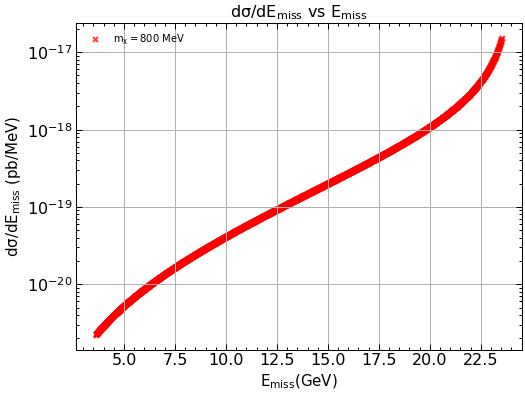

In [62]:
ye0,enval = np.array(dsigdem(m_ar[0],l_ar[0]))
plt.scatter(enval/1000,ye0,marker='x',c='red',s=25,alpha=0.75,label='$\mathregular{m_{χ} =800}$ MeV')
plt.xlabel('$\mathregular{E_{miss} (GeV)}$', fontsize=15)
plt.ylabel('$\mathregular{dσ/dE_{miss}}$ $\mathregular{(pb/MeV)}$', fontsize=15)
plt.title('$\mathregular{dσ/dE_{miss}}$ vs $\mathregular{E_{miss}}$')
plt.semilogy()
plt.legend(fontsize = 'medium')
plt.savefig('ddemis.png')
plt.grid(True)
plt.show()

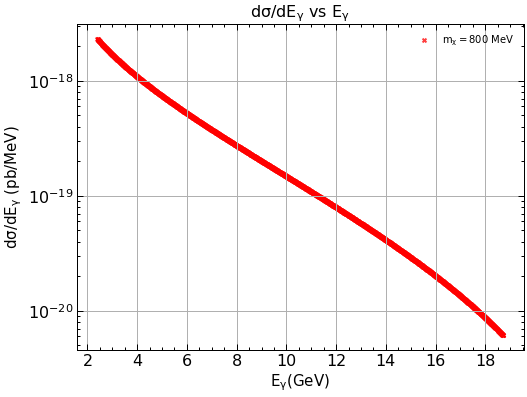

In [63]:
ye0,enval = np.array(dsigde(m_ar[0],l_ar[0]))
plt.scatter(enval/1000,ye0,marker='x',c='red',s=15,alpha=0.75,label='$\mathregular{m_{χ} = 800}$ MeV')

plt.xlabel('$\mathregular{E_{γ} (GeV)}$', fontsize=15)
plt.ylabel('$\mathregular{dσ/dE_{γ}}$ $\mathregular{(pb/MeV)}$', fontsize=15)
plt.title('$\mathregular{dσ/dE_{γ}}$ vs $\mathregular{E_{γ}}$')
#plt.ylim(10e-41, 10e-36)
plt.semilogy()
plt.legend(fontsize = 'medium')
plt.savefig('ddeg.png')
plt.grid(True)
plt.show()

In [64]:
m_test = np.linspace(800,200,7)
m_test

array([800., 700., 600., 500., 400., 300., 200.])

In [65]:
l_test = calc_all(m_test)
l_test/1000

array([95.16424164, 89.01800307, 82.41466527, 75.23396535, 67.29132618,
       58.27603888, 47.58228202])

In [66]:
#therefore root_s can be fixed at 24GeV safely
#20 madgraph runs to find relation between lambda and sigma

In [67]:
from scipy.integrate import simpson

In [68]:
len(ye0)

2000

In [69]:
integral = simpson(ye0,x=enval)
print(integral*(hbarc**2)*10e+10,"pb") #for m=800 MeV, Lambda = corresponding, root_s = 24GeV

22.042313048394924 pb


In [31]:
l_ar

array([47582.28201833])

In [32]:
#run numbers noting 07,09,10,11,12,13
sigma = [0.001154,0.001509,0.002054,0.002958,0.004639,0.008204,0.01843]

In [33]:
def fit(x,a,b):
    return a*(x**(-b))

In [34]:
lam=[95.16424164, 89.01800307, 82.41466527, 75.23396535, 67.29132618,
       58.27603888, 47.58228202]

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scienceplots
plt.style.use(['science', 'notebook'])

In [36]:
popt, pcov = curve_fit(fit, lam, sigma)

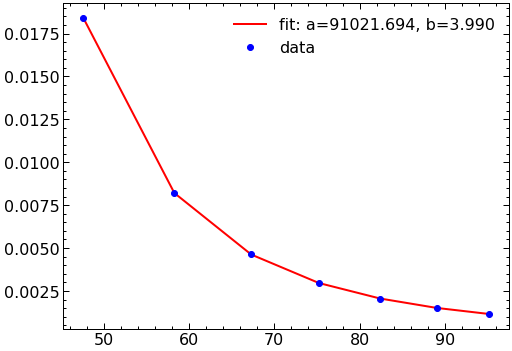

In [37]:
plt.plot(lam, fit(lam, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(lam, sigma, 'bo', label='data')
plt.legend()
plt.show()